In [1]:
import numpy as np
from CRR import ConformalRidgeRegressor

cp = ConformalRidgeRegressor()

In [2]:
N = 500
mu0 = 0
mu1 = 0.1
X0 = np.random.uniform(0, 1, (N, 4))
y0 = np.sin(X0.sum(axis=1)) + np.random.normal(mu0, 0.1, N) # Gaussian noise wiht zero mean and variance 0.1
X1 = np.random.uniform(0, 1, (N, 4))
y1 = np.sin(X1.sum(axis=1)) + np.random.normal(mu1, 0.1, N) # Gaussian noise wiht 0.1 mean and variance 0.1

X = np.vstack([X0, X1])
y = np.hstack([y0, y1])

In [3]:
from CRR import ConformalRidgeRegressor
from martingale import PluginMartingale

ridge_a = 1
cp = ConformalRidgeRegressor(a=ridge_a)

martingale = PluginMartingale()

p_values = []
martingale_values = []

for i, (obj, lab) in enumerate(zip(X, y)):
    p = cp.compute_smoothed_p_value(obj, lab)
    p_values.append(p)
    cp.learn_one(obj, lab)
    martingale.update_log_martingale(p_values)
    martingale_values.append(martingale.logM)

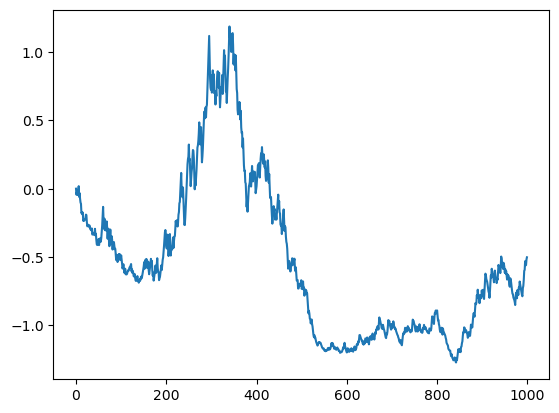

In [4]:
import matplotlib.pyplot as plt
plt.plot(martingale_values)

In [5]:
from CRR import KernelConformalRidgeRegressor
from kernels import LinearKernel, GaussianKernel
from martingale import PluginMartingale

ker = GaussianKernel(1)

kernel_a = 1
cp = KernelConformalRidgeRegressor(a=kernel_a, kernel=ker)

martingale = PluginMartingale()

p_values = []
martingale_values_kernel = []

for i, (obj, lab) in enumerate(zip(X, y)):
    p = cp.compute_smoothed_p_value(obj, lab)
    p_values.append(p)
    cp.learn_one(obj, lab)
    martingale.update_log_martingale(p_values)
    martingale_values_kernel.append(martingale.logM)

KeyboardInterrupt: 

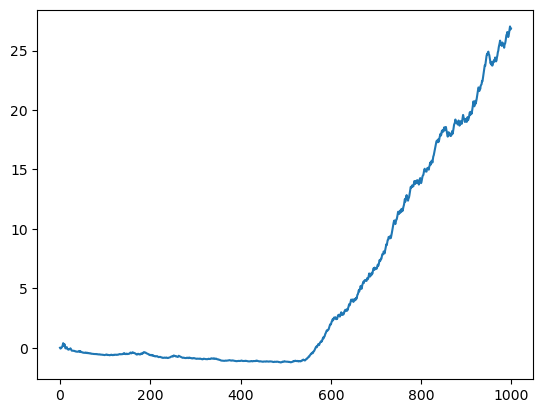

In [ ]:
import matplotlib.pyplot as plt
plt.plot(martingale_values_kernel)

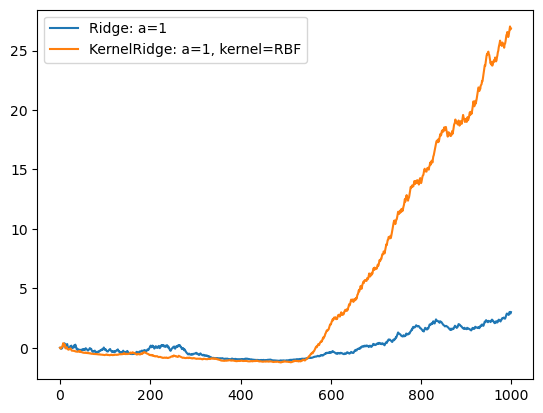

In [ ]:
plt.plot(martingale_values, label=f'Ridge: a={ridge_a}')
plt.plot(martingale_values_kernel, label=f'KernelRidge: a={kernel_a}, kernel={ker.name}')
plt.legend()